In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

In [3]:
r=torch.ones(5,2)
r.uniform_(-1,1)
r

tensor([[-0.5254,  0.8601],
        [-0.3125,  0.0835],
        [ 0.9974, -0.4869],
        [ 0.2767,  0.5836],
        [ 0.5617, -0.5642]])

In [5]:
r[:,0]

tensor([-0.0355, -0.7880,  0.1358,  0.6603, -0.5599])

In [4]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.3124,  1.0000],
        [-0.7854,  1.0000],
        [ 0.5836,  1.0000],
        [ 0.5960,  1.0000],
        [-0.4540,  1.0000]])

In [5]:
a = tensor(3.,2)
a

tensor([3., 2.])

In [6]:
y = x@a + torch.rand(n)

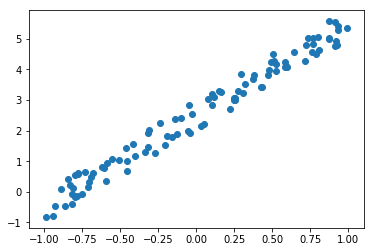

In [7]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [9]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [80]:
a = tensor(-1.,1.)
#a = tensor(3.,2.5)

In [73]:
y_hat = x@a
mse(y_hat, y)

tensor(8.2007)

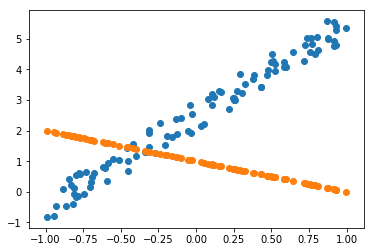

In [74]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [81]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [82]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss, a)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [83]:
lr = 1e-1
for t in range(100): 
    update()

tensor(8.2007, grad_fn=<MeanBackward1>) Parameter containing:
tensor([-1.,  1.], requires_grad=True)
tensor(1.3570, grad_fn=<MeanBackward1>) Parameter containing:
tensor([1.1087, 2.3670], requires_grad=True)
tensor(0.3632, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.0913, 2.4898], requires_grad=True)
tensor(0.1463, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.5550, 2.4917], requires_grad=True)
tensor(0.0977, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.7746, 2.4866], requires_grad=True)
tensor(0.0868, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.8786, 2.4835], requires_grad=True)
tensor(0.0843, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.9279, 2.4820], requires_grad=True)
tensor(0.0838, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.9512, 2.4812], requires_grad=True)
tensor(0.0837, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.9623, 2.4809], requires_grad=True)
tensor(0.0836, grad_fn=<MeanBackward1>) Par

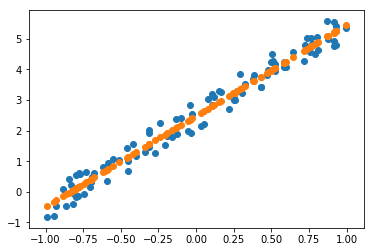

In [52]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [84]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [85]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.